<a href="https://colab.research.google.com/github/AndreYang333/ExplainableAI/blob/main/new_assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7
## Minjie Yang(my189)
 Link to reference code:https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/testing_concept_activation_vectors.ipynb

 Link to github:https://github.com/AndreYang333/ExplainableAI.git

# Code Part

In [4]:
# We are going to clone the tcav repo in GitHub:
!git clone https://github.com/tensorflow/tcav.git tcav
%cd tcav
!ls

# Next, we will create the datasets
%cd /content/tcav/tcav/tcav_examples/image_models/imagenet
%run download_and_make_datasets.py --source_dir=Minjie --number_of_images_per_folder=10 --number_of_random_folders=10

%cd /content/tcav

fatal: destination path 'tcav' already exists and is not an empty directory.
/content/tcav/tcav
activation_generator.py  __init__.py	run_params.py  tcav_results   utils.py
cav.py			 model.py	tcav_examples  tcav_test.py   utils_test.py
cav_test.py		 model_test.py	tcav.py        utils_plot.py
/content/tcav/tcav/tcav_examples/image_models/imagenet
Downloaded 10 for tiger
Successfully created data at Minjie
/content/tcav


In [5]:
!pip install tcav matplotlib==2.2.4 Pillow==8.2.0 scikit-learn==0.20.3 scipy==1.2.1 tensorflow==2.14.1 numpy==1.19.2 protobuf==3.10.0 pandas==1.0.3


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37.0/37.0 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.9/47.9 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.8/11.8 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.1/23.1 MB 48.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.3/7.3 MB 74.7 MB/s eta 0:00:00
  Installing build dependencies ...

In [6]:
# Basic
import os
import absl
import random
import matplotlib.pyplot as plt
from PIL import Image

# Models
import tensorflow as tf

#XAI
import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot


## Curate + store data
source_dir: directories for images of concepts, target class and random images. Each should be a sub-folder within this directory.

You need roughly 50-200 images per concept and target class (10-20 will work, but 200 is recommended by original paper authors).
cav_dir: directory to store CAVs (None if you don't want to store)

target, concept: names of the target class and concepts (strings) - these are folder names in source_dir

bottlenecks: list of bottleneck names (intermediate layers in your model) that you want to use for TCAV

In [7]:
# Model wrapper (InceptionV3 and GoogleNet are provided in model.py)
model_to_run = 'GoogleNet'
# Name of the parent directory that results are stored (if cacheing)
project_name = 'tcav_class_test'
working_dir = '/content/tcav/tcav'
# Location where activations are stored
activation_dir =  working_dir+ '/activations/'
# Location where CAVs are stored (or None if not storing)
cav_dir = working_dir + '/cavs/'
# Location of images
source_dir = '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie'
# Bottleneck layer
bottlenecks = ['mixed4c']

# Create directories if they don't exist
utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(working_dir)
utils.make_dir_if_not_exists(cav_dir)

# Regularizer penalty parameter for linear classifier to get CAVs
alphas = [0.1]

target = 'tigger'
concepts = ['stripped']


In [8]:
%cp -av '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224' '/content/tcav/tcav/mobilenet_v2_1.0_224'
%rm '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224'


'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224' -> '/content/tcav/tcav/mobilenet_v2_1.0_224'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_eval.pbtxt' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_eval.pbtxt'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt.data-00000-of-00001' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt.data-00000-of-00001'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_frozen.pb' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_frozen.pb'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.tflite' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.tflite'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/mobilenet_v2_

In [9]:

%cp -av '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h' '/content/tcav/tcav/inception5h'
%rm '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h'

'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h' -> '/content/tcav/tcav/inception5h'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h/imagenet_comp_graph_label_strings.txt' -> '/content/tcav/tcav/inception5h/imagenet_comp_graph_label_strings.txt'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h/tensorflow_inception_graph.pb' -> '/content/tcav/tcav/inception5h/tensorflow_inception_graph.pb'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h/LICENSE' -> '/content/tcav/tcav/inception5h/LICENSE'
rm: cannot remove '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie/inception5h': Is a directory


## Visualize Images from the Target, Concepts, and Random folders

Images from target folder:


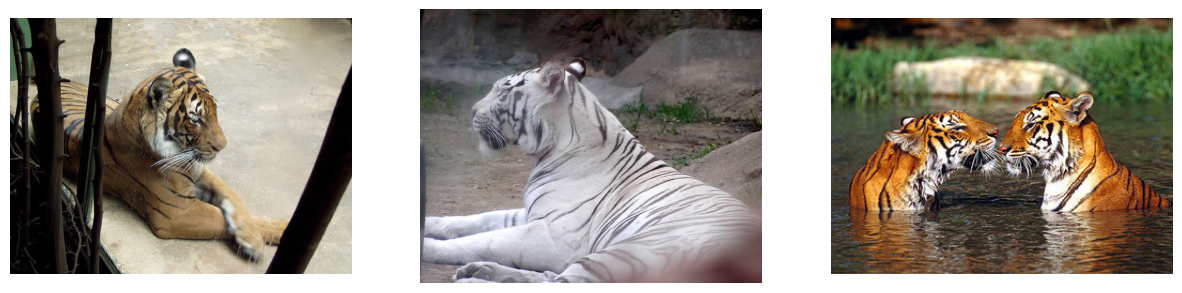

Images from striped folder:


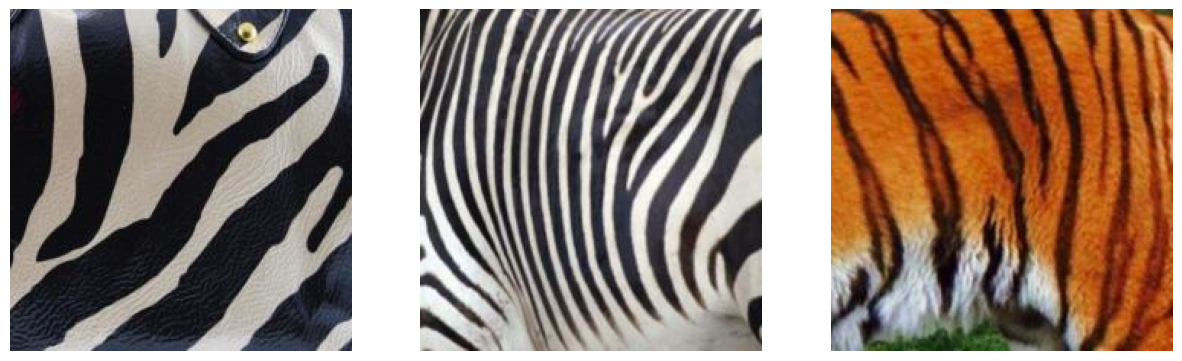

Images from random folder:


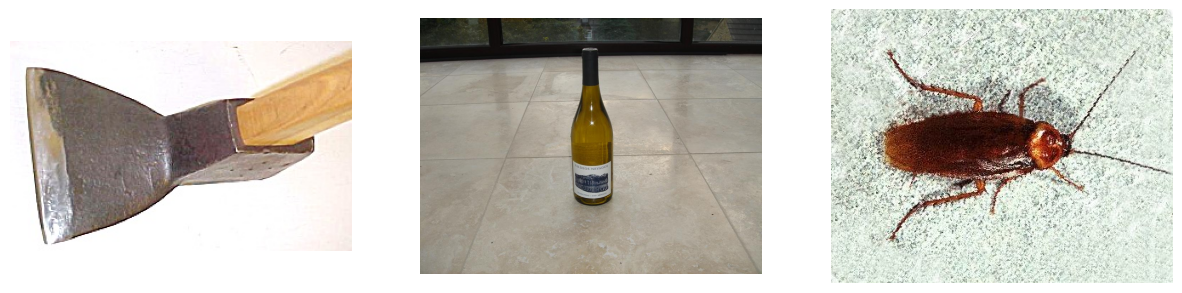

In [11]:
def display_random_images(directory, num_images):
    # Get list of files in the directory
    files = os.listdir(directory)

    # Filter out non-image files
    image_files = [f for f in files if f.endswith('.jpg')]

    # Check if there are enough image files
    if len(image_files) < num_images:
        print(f"Not enough images in {directory}.")
        return

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Display selected images
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path)
        axs[i].imshow(image)
        axs[i].axis('off')
    plt.show()

# Define source directory
source_dir = '/content/tcav/tcav/tcav_examples/image_models/imagenet/Minjie'
target = 'tiger'
concepts = ['striped']
random_folder = 'random500_10'

# Display 3 images from the target folder in a row
print("Images from target folder:")
display_random_images(os.path.join(source_dir, target), 3)

# Display 3 images from each concept folder
for concept in concepts:
    print(f"Images from {concept} folder:")
    display_random_images(os.path.join(source_dir, concept), 3)

# Display 3 images from a random folder
print("Images from random folder:")
display_random_images(os.path.join(source_dir, random_folder), 3)


## Model Wrapper
See below for instructions on creating your own.

GRAPH_PATH is where the trained model is stored. LABEL_PATH is where the labels are stored

In [12]:
sess = utils.create_session() # a tensorflow session

GRAPH_PATH = "/content/tcav/tcav/inception5h/tensorflow_inception_graph.pb"
LABEL_PATH = "/content/tcav/tcav/inception5h/imagenet_comp_graph_label_strings.txt"

mymodel = model.GoogleNetWrapper_public(sess,GRAPH_PATH,LABEL_PATH)

## Return Avtivations

In [13]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=100)

## Run TCAV and show results

In [14]:
absl.logging.set_verbosity(0)
num_random_exp=10 # Recommend >10
mytcav = tcav.TCAV(sess,target,
                   concepts,
                   bottlenecks,
                   act_generator,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp) #10)
print ('Started')
results = mytcav.run(run_parallel=False)
print ('Completed')

Started
Completed


# Statistical Part

## Hypothesis:
H0: The 'striped' concent does not influence the prediction of target 'tiger' in the GoogleNet model.



H1: The 'striped' concent  influences the prediction of target 'tiger' in the GoogleNet model.

Class = tiger
  Concept = striped
    Bottleneck = mixed4c. TCAV Score = 0.71 (+- 0.16), random was 0.51 (+- 0.21). p-val = 0.005 (significant)
{'mixed4c': {'bn_vals': [0.7125], 'bn_stds': [0.15860721925561902], 'significant': [True]}}


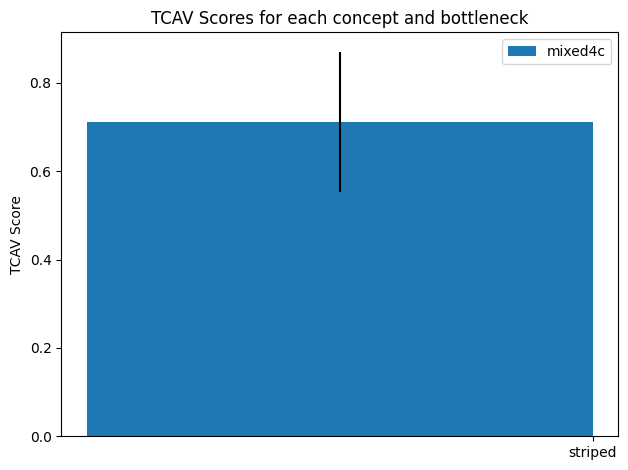

In [28]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)

### Result Analysis

The TCAV score was **0.71**, while the score for random concepts was **0.51**. This high TCAV score (0.71) indicates that the model strongly associates the "striped" pattern with the "tiger" class, suggesting that "striped" features are critical for the model in identifying images of tigers.

- **Significance Test**: With a p-value of **0.005**, which is well below the 0.05 significance threshold, the score difference between the "striped" concept and random concepts is statistically significant. This suggests that the model's activation on the "striped" concept for "tiger" is unlikely to be due to chance, reinforcing the importance of the "striped" feature in model decisions.


# Explanation Part
## CAVÔºö
Concept Activation Vectors (CAVs) are a method used in interpretable machine learning to quantify how much a neural network relies on human-understandable concepts for making predictions. CAVs work by defining a direction in the network's internal activation space that corresponds to a particular concept, such as "striped". This direction is learned by training a linear classifier to distinguish between activations caused by images that contain the concept and those that do not. Once the CAV is computed, it can be used to assess how sensitive the model's predictions are to changes in the direction of that concept. The directional derivative along the CAV indicates whether the concept has a positive or negative influence on the model's output for a given class. CAVs enable insights into what the model has learned in terms of interpretable concepts.

## Implementation
For any given concept, TCAV measures the extent of that concept‚Äôs influence on the model‚Äôs prediction for a certain class

Concept Activation Vectors (CAV) are a numerical representation of a concept in the activation space of a neural network layer

Implementation:

1. Curate two datasets

  A concept dataset that represents concept C

  A random dataset
2. Target a hidden layer ùëô and train a binary classifier which separates the activations generated by the concept set from those generated by the random set

  The binary classifier can be an SVM or logistic regression model

  The coefficient vector of this trained binary classifier is the CAV, vlc

3. Given an image input ùë•, we can measure its conceptual sensitivity by calculating the directional derivative of the prediction in the direction of the unit CAV


### Interesting Findings

- **Model Reliance on the "Striped" Concept**: The significance test highlights that the model heavily relies on the "striped" feature when identifying the "tiger" class. Interestingly, even without being explicitly told that "tigers" have stripes, the model has learned to associate "striped" patterns as a key feature for recognizing tigers. This provides insight into the model's internal preferences, making it more interpretable in the context of animal image classification.

- **Feature Extraction in the Bottleneck Layer**: The stable activation of "striped" patterns in the `mixed4c` bottleneck layer suggests that this layer is particularly sensitive to textures like stripes. This insight can guide the design of more interpretable model structures.